In [1]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import metrics
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score

In [2]:
# Load the data
filepath='C:/Users/dell/Downloads/DryBeanDataset/DryBeanDataset/Dry_Bean_Dataset.xlsx'
data = pd.read_excel(filepath)

# Check the data
data['ID']=data.index
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,ID
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER,1
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER,2
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER,3
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON,13606
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON,13607
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON,13608
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON,13609


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
 17  ID          

In [4]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
ID                 0
dtype: int64

In [5]:
data["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063,6805.000000
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366,3929.301592
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687,0.000000
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703,3402.500000
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386,6805.000000
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883,10207.500000
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733,13610.000000


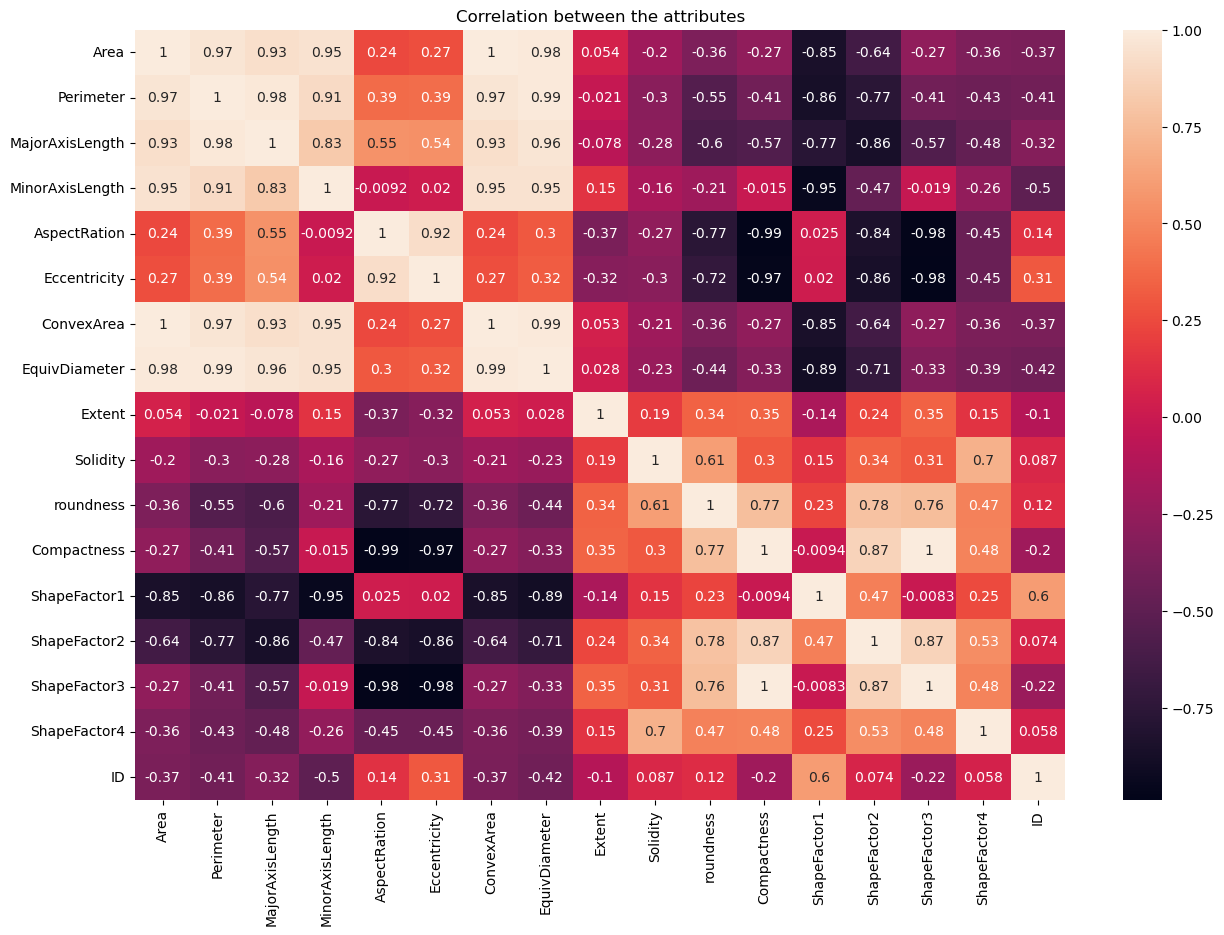

In [8]:
#using the in-built function and finding the correlation between variables.
df_corr = data.corr(method ='pearson')

#plotting the heatmap for better visualisation
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype=bool),annot=True)
plt.title('Correlation between the attributes')
plt.show()

In [9]:
df_corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ID
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.369273
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.411175
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.324677
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.502747
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,0.139467
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,0.308182
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.369615
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.418614
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.099929
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.087182


# XGBoost

In [10]:
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

# Split the data into features and target
X = data.drop(['Class','ID'], axis=1) #Features
y = data['Class'] #target


# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred

array([5, 0, 5, ..., 3, 2, 3], dtype=int64)

In [11]:
def accuracy_calculator(y_test,y_pred):   # Evaluate the model
    y_test = le.inverse_transform(y_test)
    y_pred = le.inverse_transform(y_pred)
    acc=accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc}')
    prec=precision_score(y_test, y_pred,average=None).mean()
    print("Precision value :",prec )
    rec=recall_score(y_test, y_pred, average=None).mean()
    print("Recall value :",rec)
    f1_value=f1_score(y_test, y_pred, average=None).mean()
    print("F1 Value :",f1_value )
    Accuracy_Dictionary={'Accuracy':acc,'precision':prec,'recall_value':rec,'f1_value':f1_value}
    # Assuming y_test2 and y_pred3 are your ground truth and predicted labels, respectively
    cm=ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    ay=plt.gca()
    ay.set_xticklabels(ay.get_xticklabels(), fontsize=10, rotation=45)
    ay.set_yticklabels(ay.get_yticklabels(), fontsize=10, rotation=45)
    plt.show()
    return Accuracy_Dictionary

Accuracy: 0.9250826294528094
Precision value : 0.9388933084686478
Recall value : 0.9359945923703431
F1 Value : 0.9373655155040995


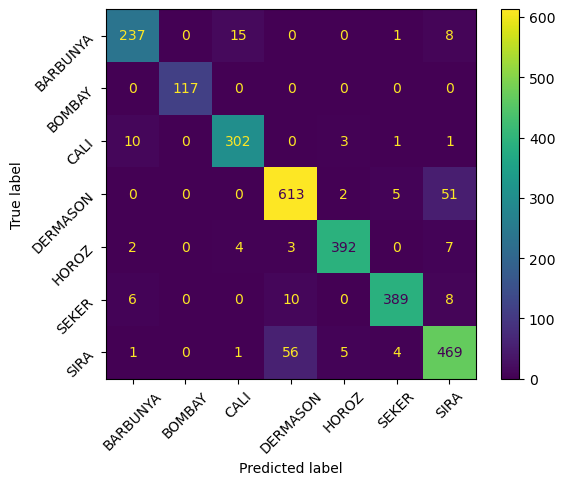

In [12]:
XGBoost=accuracy_calculator(y_test,y_pred)

In [13]:
# Perform k-fold cross-validation on the model
cv_scores_xg = cross_val_score(model, y_test,y_pred, cv=10)
# Print cross-validation scores
print("Cross-validation scores: ", cv_scores_xg.mean())

Cross-validation scores:  0.9250673346261582


### XGBoost with Hyperparameter Tuning

In [14]:
# Start the timer
start_time = time.time()

# Data preprocessing
# Convert categorical target variable to numerical

# Split the data into features and target
X2 = data.drop(['Class','ID'], axis=1)
y2 = data['Class']
ids=data['ID']#for getting the id instamnces

In [15]:
# Split the dataset into training set and test set
X_train2, X_test2, y_train2, y_test2,ids_train,ids_test = train_test_split(X2, y2,ids, test_size=0.2, random_state=42)

# Initialize XGBoost classifier
model2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

In [16]:
# Set the parameters to tune
parameters = {
    'max_depth': [3, 5, 7, 10],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.3]
}

# parameters = {
#     'max_depth': [ 10],
#     'n_estimators': [100],
#     'learning_rate': [ 0.1,]
# }

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=parameters, cv=5, scoring='accuracy')

# Fit the data to GridSearchCV (this will start the tuning process)
grid_search.fit(X_train2, y_train2)

# Get the best parameters
print('Best parameters found: ', grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}


In [17]:
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred2 = best_model.predict(X_test2)
y_pred2

# End the timer
end_time = time.time()

# Calculate the running time
running_time_XGBoost = end_time - start_time

In [18]:
y_pred_labels2 = le.inverse_transform(y_pred2)

Accuracy: 0.9265515975027543
Precision value : 0.9397191771330778
Recall value : 0.937671337784139
F1 Value : 0.9386062080753776


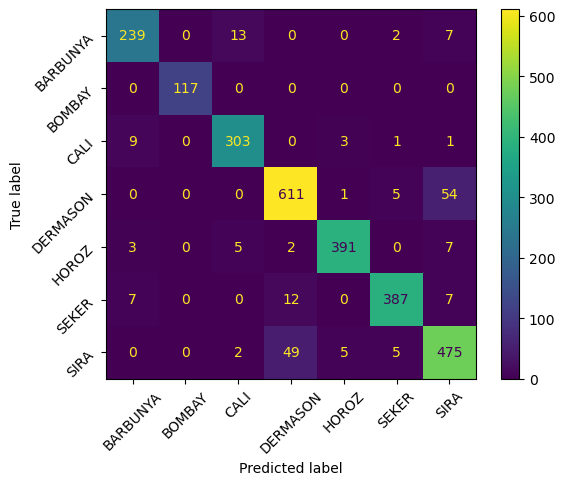

In [19]:
Tuned_XGBoost= accuracy_calculator(y_test2,y_pred2)

In [20]:
# Perform k-fold cross-validation on the model
cv_scores_xg_tune = cross_val_score(model2, y_test2,y_pred2, cv=10)
# Print cross-validation scores
print("Cross-validation scores: ", cv_scores_xg_tune.mean())

Cross-validation scores:  0.926536576168929


In [21]:
# Create a DataFrame with ids and predictions, and save it as a CSV file
predictions = pd.DataFrame({
    'id': ids_test,
    'predicted_label': y_pred_labels2
})

predictions.to_csv('predictions.csv', index=False)

# Decision tree

In [22]:
# Start the timer
start_time_2 = time.time()

# Data preprocessing
# Convert categorical target variable to numerical

# # Split the data into features and target
X3 = data.drop('Class', axis=1)
y3 = data['Class']

scaler = StandardScaler()
X3 = scaler.fit_transform(X)

# split the data into a training set and a test set
X_train4, X_test4, y_train4, y_test4 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# define the model
model4 = DecisionTreeClassifier()

# define the parameters for the grid search
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

# perform a grid search
grid_search = GridSearchCV(estimator=model4,  param_grid=params, cv=5, scoring='accuracy')
grid_search.fit(X_train4, y_train4)

# print the best parameters
print("Best parameters: ", grid_search.best_params_)

# evaluate the model
y_pred4 = grid_search.predict(X_test4)
y_pred4

# End the timer
end_time_2 = time.time()

# Calculate the running time
running_time_DT = end_time_2 - start_time_2

Best parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


Accuracy: 0.9103929489533603
Precision value : 0.9252732732349832
Recall value : 0.9209427903784634
F1 Value : 0.9227226339018131


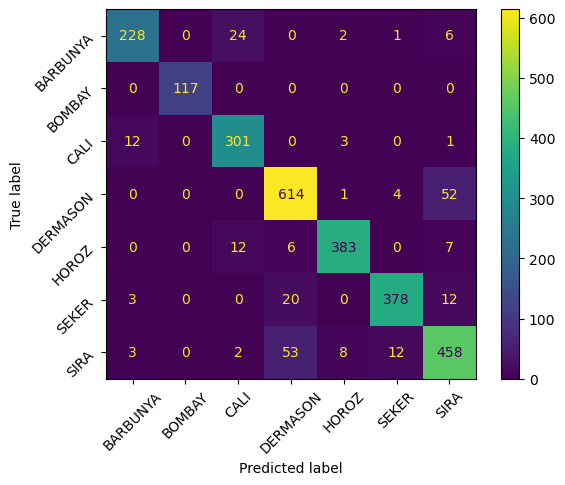

In [23]:
Decision_tree=accuracy_calculator(y_test4,y_pred4)

# Evaluation of the models results

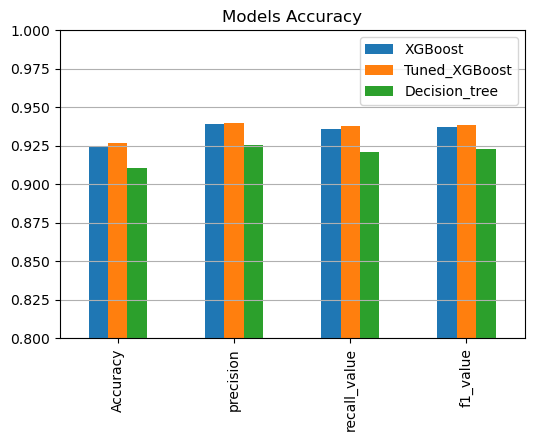

In [24]:
#plots accuracy

Models_accuracy = pd.DataFrame({'XGBoost':pd.Series(XGBoost),'Tuned_XGBoost':pd.Series(Tuned_XGBoost),'Decision_tree':pd.Series(Decision_tree)})
Models_accuracy

ax = Models_accuracy.plot(kind='bar', figsize=(6,4), title='Models Accuracy',fontsize=10)

y_min = 0.8
y_max = 1
plt.ylim(y_min, y_max)
plt.grid(axis='y')

plt.show()

In [25]:

# Now y_pred_labels contains the original labels
y_test_labels2 = le.inverse_transform(y_test2)
print(y_test_labels2)

['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'SIRA']


In [26]:
# Generate and display the classification report
class_report = classification_report(y_test_labels2,y_pred_labels2)
print("Classification Report for XgBoost:")
print(class_report)

Classification Report for XgBoost:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.92      0.92       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.94      0.96      0.95       317
    DERMASON       0.91      0.91      0.91       671
       HOROZ       0.98      0.96      0.97       408
       SEKER       0.97      0.94      0.95       413
        SIRA       0.86      0.89      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



In [27]:
y_pred_labels4 = le.inverse_transform(y_pred4)
y_test_labels4 = le.inverse_transform(y_test4)
# Now y_pred_labels contains the original labels
print(y_pred_labels4)

['SEKER' 'BARBUNYA' 'SEKER' ... 'DERMASON' 'CALI' 'DERMASON']


In [28]:
# Generate and display the classification report
class_report = classification_report(y_test_labels4,y_pred_labels4)
print("Classification Report for Decision TRee:")
print(class_report)

Classification Report for Decision TRee:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.87      0.90       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.95      0.92       317
    DERMASON       0.89      0.92      0.90       671
       HOROZ       0.96      0.94      0.95       408
       SEKER       0.96      0.92      0.94       413
        SIRA       0.85      0.85      0.85       536

    accuracy                           0.91      2723
   macro avg       0.93      0.92      0.92      2723
weighted avg       0.91      0.91      0.91      2723



In [29]:
print(confusion_matrix(y_test4,y_pred4))

[[228   0  24   0   2   1   6]
 [  0 117   0   0   0   0   0]
 [ 12   0 301   0   3   0   1]
 [  0   0   0 614   1   4  52]
 [  0   0  12   6 383   0   7]
 [  3   0   0  20   0 378  12]
 [  3   0   2  53   8  12 458]]


In [30]:
print('running time of XGBoost Classifier',running_time_XGBoost)
print('running time of Decision tree',running_time_DT)

running time of XGBoost Classifier 3583.988265991211
running time of Decision tree 106.06143474578857
